# 0. Imports and data loading

All packages and modules are imported in the "functions.py" file located next to this notebook

Additionally a number of code chunks employed in previous versions of this notebook have been
defined into functions and placed in that same file in order to simplify the exposition of the 
main points and results of the assignment. For further insight on the code behind the actions
here executed this "functions.py" file can be visited, there all the details can be found.

IMPORTANT: for the appropriate functioning of this notebook it must be placed in the same 
directory as "functions.py"

In [ ]:
#from functions import *

In [ ]:
#features = np.load('data/data.npy')
#labels = np.load('data/labels.npy')

# 1. Elemental data preprocessing



### 1.1 Splitting Data

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

### Extra: Easy going here! - Sample restriction 😎🤙🌴  \#prayforkernel 🙏

In [61]:
#############################################
#             CONTROL PANEL (Only restriction)

# Sample restriction
restriction = True
address_vp_imbalance = True
proportion = 0.25
#                                           
#############################################

In [62]:
if restriction == True:
    
    if address_vp_imbalance == True:
        
        restricted_sample_train, restricted_sample_labels_train = restrict_sample_vp_imb(proportion , X_train, y_train)
        generate_summary("R", y_train, restricted_sample_labels_train)
        
    else:

        restricted_sample_train, restricted_sample_labels_train = restrict_sample(proportion , X_train, y_train)
        generate_summary("R", y_train, restricted_sample_labels_train)
        
        
    X_train = np.array(restricted_sample_train)
    y_train = np.array(restricted_sample_labels_train)

SAMPLE RANDOM SUBSAMPLING SUMMARY
(Only covering training sample)


ORIGINAL TRAINING SAMPLE
Original number of instances: 4147
Original instance distribution by class: 
 Bacterial Pneumonia       1689
Viral Pneumonia           1182
No Pneumonia (healthy)     963
COVID-19                   313
dtype: int64

NEW TRAINING SAMPLE
Number of instances in new sample: 1408
Instance distribution by class in new sample: 
 Viral Pneumonia           433
Bacterial Pneumonia       422
COVID-19                  313
No Pneumonia (healthy)    240
dtype: int64


### 1.2 Normalize Data

In [63]:
# Float conversion to allow normalization
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_val=X_val.astype('float32')

# Normalization 
X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/255.0

### 1.3 Categorical encoding

In [64]:
# Define a dictionary that maps each category to a numerical value
label_map = {"Bacterial Pneumonia": 0, "Viral Pneumonia": 1, "No Pneumonia (healthy)": 2, "COVID-19": 3}

# Encode the categorical labels as numerical values using the label map
y_train_encoded = np.vectorize(label_map.get)(y_train)
y_val_encoded = np.vectorize(label_map.get)(y_val)
y_test_encoded = np.vectorize(label_map.get)(y_test)

# Convert the numerical labels to one-hot encoded format
num_classes = 4
y_train_onehot = keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_val_onehot = keras.utils.to_categorical(y_val_encoded, num_classes=num_classes)
y_test_onehot = keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)

# 2. Baseline Model

### 2.1 Build and train baseline model

In [65]:
baseline_model = build_baseline_model()

# Train the model for 10 epochs with a batch size of 32
history = baseline_model.fit(
    X_train,
    y_train_onehot,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val_onehot)
)

Epoch 1/10
44/44 [==============================] - 7s 100ms/step - loss: 1.3613 - accuracy: 0.2955 - val_loss: 1.2170 - val_accuracy: 0.3803
Epoch 2/10
44/44 [==============================] - 3s 73ms/step - loss: 1.1264 - accuracy: 0.4638 - val_loss: 1.0192 - val_accuracy: 0.5343
Epoch 3/10
44/44 [==============================] - 3s 74ms/step - loss: 0.9145 - accuracy: 0.6009 - val_loss: 0.9795 - val_accuracy: 0.5618
Epoch 4/10
44/44 [==============================] - 3s 72ms/step - loss: 0.8668 - accuracy: 0.6186 - val_loss: 0.8817 - val_accuracy: 0.6001
Epoch 5/10
44/44 [==============================] - 3s 72ms/step - loss: 0.7809 - accuracy: 0.6591 - val_loss: 0.8231 - val_accuracy: 0.6443
Epoch 6/10
44/44 [==============================] - 3s 74ms/step - loss: 0.7427 - accuracy: 0.6605 - val_loss: 0.7881 - val_accuracy: 0.6471
Epoch 7/10
44/44 [==============================] - 3s 74ms/step - loss: 0.7005 - accuracy: 0.6996 - val_loss: 0.8165 - val_accuracy: 0.6746
Epoch 8/10
4

In [66]:
baseline_all_val_acc = np.mean(history.history["val_accuracy"])
baseline_all_val_loss = np.mean(history.history["val_loss"])
baseline_all_train_acc = np.mean(history.history["accuracy"])
baseline_all_train_loss = np.mean(history.history["loss"])
print("BASELINE RESULTS:")
print("-"*len("BASELINE RESULTS:"))
print()
print("**Training**")
print("The average training accuracy among all epochs is: {:.4}".format(baseline_all_train_acc))
print("The average training loss among all epochs is: {:.4}".format(baseline_all_train_loss))
print()
print("**Validation**")
print("The average validation accuracy among all epochs is: {:.4}".format(baseline_all_val_acc))
print("The average validation loss among all epochs is: {:.4}".format(baseline_all_val_loss))

BASELINE RESULTS:
-----------------

**Training**
The average training accuracy among all epochs is: 0.6161
The average training loss among all epochs is: 0.845

**Validation**
The average validation accuracy among all epochs is: 0.6038
The average validation loss among all epochs is: 0.886


### 2.2 Analyze the performance of the baseline model

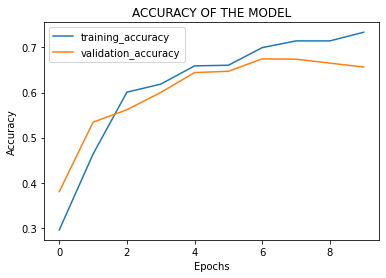

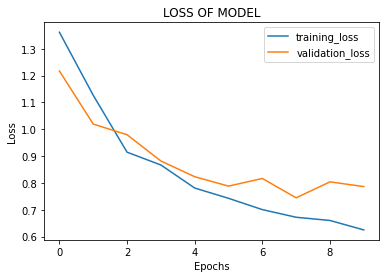

44/44 [==============================] - 1s 17ms/step


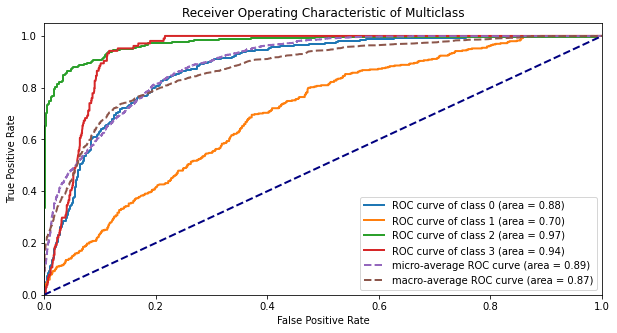

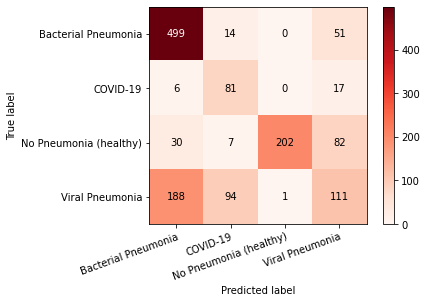

                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.69      0.88      0.78       564
              COVID-19       0.41      0.78      0.54       104
No Pneumonia (healthy)       1.00      0.63      0.77       321
       Viral Pneumonia       0.43      0.28      0.34       394

              accuracy                           0.65      1383
             macro avg       0.63      0.64      0.61      1383
          weighted avg       0.66      0.65      0.63      1383



In [67]:
##------ploting from BASELINE only 
plot_acc_loss(history)

##----Getting prediction based in the baseline model 
y_pred = baseline_model.predict(X_test) 

#-------Plot ROC of the baselinemodel 
plot_ROC_curve(y_pred,y_test_onehot, num_classes)

##----CM Matrix plot
plot_cm(label_map,y_pred,y_test)

#precision and recall and f1-score, accuracy 
table_p_r_f1(y_test,y_pred,label_map)

# 3. Adapting/fine-tuning the network

### 3.1 Data augmentation/restriction

In [69]:
#############################################
#             CONTROL PANEL (Fine tuning)

# Random Subsampling
restriction = True
address_vp_imbalance = True
proportion = 0.25

# Data Augmentation
augmentation_flip = False                       
augmentation_rotate = False

#                                           
#############################################


# safety mechanism: augmentation and restriction are not meant to be combined
if restriction == True:
    agumentation_flip = False
    augmentation_rotate = False

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [71]:
if restriction == True:
    
    if address_vp_imbalance == True:
        restricted_sample_train, restricted_sample_labels_train = restrict_sample_vp_imb(proportion , X_train, y_train)
        generate_summary("R", y_train, restricted_sample_labels_train)
        X_train = np.array(restricted_sample_train)
        y_train = np.array(restricted_sample_labels_train)
        
    else:
        restricted_sample_train, restricted_sample_labels_train = restrict_sample(proportion , X_train, y_train)
        generate_summary("R", y_train, restricted_sample_labels_train)
        X_train = np.array(restricted_sample_train)
        y_train = np.array(restricted_sample_labels_train)

elif augmentation_flip == True:

    augmentedfeatures, augmentedlabels = augment_sample(X_train, y_train, a_rotate=augmentation_rotate)
    generate_summary("R", y_train, augmentedlabels)
    X_train = np.array(augmentedfeatures)
    y_train = np.array(augmentedlabels)
    
else:
    print("NEITHER RANDOM SUBSAMPLING NOR AUGMENTATION WERE NOT CONDUCTED")

SAMPLE RANDOM SUBSAMPLING SUMMARY
(Only covering training sample)


ORIGINAL TRAINING SAMPLE
Original number of instances: 4147
Original instance distribution by class: 
 Bacterial Pneumonia       1689
Viral Pneumonia           1182
No Pneumonia (healthy)     963
COVID-19                   313
dtype: int64

NEW TRAINING SAMPLE
Number of instances in new sample: 1408
Instance distribution by class in new sample: 
 Viral Pneumonia           433
Bacterial Pneumonia       422
COVID-19                  313
No Pneumonia (healthy)    240
dtype: int64


### 3.2 Categorical encoding of new labels

In [72]:
# Float conversion to allow normalization
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_val=X_val.astype('float32')

# Normalization 
X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/255.0

In [73]:
# Define a dictionary that maps each category to a numerical value
label_map = {"Bacterial Pneumonia": 0, "Viral Pneumonia": 1, "No Pneumonia (healthy)": 2, "COVID-19": 3}

# Encode the categorical labels as numerical values using the label map
y_train_encoded = np.vectorize(label_map.get)(y_train)

# Convert the numerical labels to one-hot encoded format
num_classes = 4
y_train_onehot = keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)

### 3.3 Network fine tuning

In [55]:
#After some tryouts, Nadam reported an extra 0-2% val_accuracy in our baseline model vs Adam
#So we will find the best learning rate for this optimizer:

from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt

def lr_schedule(epoch, initial_lr, final_lr, total_epochs):
    """
    calculates the learning rate for each epoch based on the initial learning rate, final learning rate, and total number of epochs
    """
    lr = initial_lr + (final_lr - initial_lr) * (epoch / float(total_epochs))
    return lr

def plot_lr_schedule(initial_lr, final_lr, total_epochs):
    lr = [lr_schedule(epoch, initial_lr, final_lr, total_epochs) for epoch in range(total_epochs)]
    plt.plot(lr, history.history['val_loss'])
    plt.xlabel('Learning Rate')
    plt.ylabel('Validation Loss')
    plt.title('Learning Rate Schedule')
    plt.show()

# Adding a Lr Scheduler to check the learning rate evolution during training and to avoid overfitting
initial_lr = 0.01
final_lr = 0.001
baseline_epochs = 10

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: lr_schedule(epoch, initial_lr, final_lr, baseline_epochs))

baseline_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for 4 epochs with a batch size of 32
history_lr = baseline_model.fit(
    X_train,
    y_train_onehot,
    batch_size=32,
    epochs=baseline_epochs,
    validation_data=(X_val, y_val_onehot),
    callbacks=[lr_scheduler]
)

Epoch 1/10
44/44 [==============================] - 10s 110ms/step - loss: 1.3721 - accuracy: 0.3217 - val_loss: 1.3134 - val_accuracy: 0.4071 - lr: 0.0100
Epoch 2/10
44/44 [==============================] - 4s 91ms/step - loss: 1.3630 - accuracy: 0.3054 - val_loss: 1.3536 - val_accuracy: 0.2849 - lr: 0.0091
Epoch 3/10
44/44 [==============================] - 4s 88ms/step - loss: 1.3628 - accuracy: 0.2990 - val_loss: 1.3354 - val_accuracy: 0.2849 - lr: 0.0082
Epoch 4/10
44/44 [==============================] - 4s 88ms/step - loss: 1.3618 - accuracy: 0.2940 - val_loss: 1.3519 - val_accuracy: 0.4071 - lr: 0.0073
Epoch 5/10
44/44 [==============================] - 4s 87ms/step - loss: 1.3608 - accuracy: 0.3104 - val_loss: 1.3610 - val_accuracy: 0.2849 - lr: 0.0064
Epoch 6/10
44/44 [==============================] - 4s 89ms/step - loss: 1.3611 - accuracy: 0.2933 - val_loss: 1.3639 - val_accuracy: 0.2849 - lr: 0.0055
Epoch 7/10
44/44 [==============================] - 3s 74ms/step - loss: 1

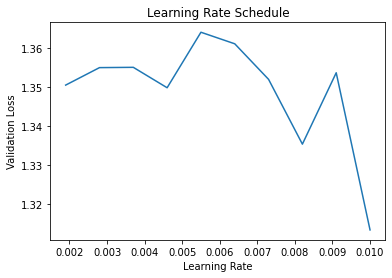

In [56]:
# Rule of thumb: optimal will be a bit lower than when lr starts climbing, usually 10 times lower the climb up point (around 0.005)
plot_lr_schedule(initial_lr, final_lr, baseline_epochs)

In [ ]:
"""from keras import backend as K

# Some memory clean-up
K.clear_session()"""

In [75]:
# K FOLD VALIDATION (5 max epochs for speeding purposes)

k = 4
num_val_samples = len(X_train) // k 
num_epochs = 10
tuned_all_val_losses = [] # Should add the score of each run at the end of the loop
tuned_all_val_acc = []
base_all_val_losses = []
base_all_val_acc = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = y_train_onehot[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train_onehot[:i * num_val_samples],
         y_train_onehot[(i + 1) * num_val_samples:]],
        axis=0)
    # (CHANGE VS BASELINE)Defining EarlyStopping callback
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=11)

    baseline_model = build_baseline_model()
    tuned_model_1 = build_tuned_model()

    # Train baseline and tuned models for 4 epochs with a batch size of 32
    print('processing baseline model')
    baseline_history = baseline_model.fit(
        partial_train_data,
        partial_train_targets,
        batch_size=32,
        epochs=num_epochs,
        validation_data=(val_data, val_targets),
        callbacks=[early_stopping]
    )
    print('processing tuned model')
    tuned_history = tuned_model_1.fit(
        partial_train_data,
        partial_train_targets,
        batch_size=32,
        epochs=num_epochs,
        validation_data=(val_data, val_targets),
        callbacks=[early_stopping]
    )
   
    # Evaluate the kfold results for BASELINE
    base_val_loss, base_val_accuracy = baseline_model.evaluate(val_data, val_targets, verbose=0)
    base_all_val_losses.append(base_val_loss)
    base_all_val_acc.append(base_val_accuracy)

    # Evaluate the kfold results for the tuned model
    tuned_val_loss, tuned_val_accuracy = tuned_model_1.evaluate(val_data, val_targets, verbose=0)
    tuned_all_val_losses.append(tuned_val_loss)
    tuned_all_val_acc.append(tuned_val_accuracy)

processing fold # 0
processing baseline model
Epoch 1/10
33/33 [==============================] - 6s 95ms/step - loss: 1.3729 - accuracy: 0.2973 - val_loss: 1.3721 - val_accuracy: 0.3068
Epoch 2/10
33/33 [==============================] - 2s 63ms/step - loss: 1.2175 - accuracy: 0.3759 - val_loss: 1.0173 - val_accuracy: 0.5767
Epoch 3/10
33/33 [==============================] - 2s 64ms/step - loss: 0.9414 - accuracy: 0.5890 - val_loss: 1.0086 - val_accuracy: 0.6335
Epoch 4/10
33/33 [==============================] - 3s 83ms/step - loss: 0.8213 - accuracy: 0.6458 - val_loss: 0.7669 - val_accuracy: 0.6960
Epoch 5/10
33/33 [==============================] - 2s 66ms/step - loss: 0.7984 - accuracy: 0.6629 - val_loss: 0.8505 - val_accuracy: 0.6477
Epoch 6/10
33/33 [==============================] - 2s 69ms/step - loss: 0.7074 - accuracy: 0.6828 - val_loss: 0.7847 - val_accuracy: 0.7131
Epoch 7/10
33/33 [==============================] - 2s 68ms/step - loss: 0.6852 - accuracy: 0.6894 - val_los

In [78]:
print("Baseline Model KF Results:")
print("-"*len("Baseline Model Results:"))
print("Avg val_acc: {}".format(np.mean(base_all_val_acc)))
print("Avg val_loss: {}".format(np.mean(base_all_val_losses)))
print()
print("Tuned Model KF Results:")
print("-"*len("Tuned Model KF Results:"))
print("Avg val_acc: {}".format(np.mean(tuned_all_val_acc)))
print("Avg val_loss: {}".format(np.mean(tuned_all_val_losses)))

Baseline Model KF Results:
-----------------------
Avg val_acc: 0.6640625
Avg val_loss: 0.8140076547861099

Tuned Model KF Results:
-----------------------
Avg val_acc: 0.6775568276643753
Avg val_loss: 0.7682460993528366


### 3.4 Analyze performance of fine-tuned model

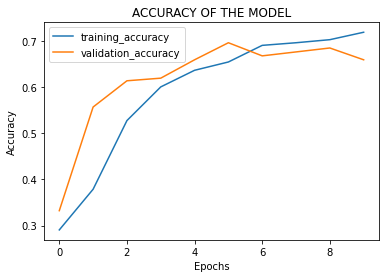

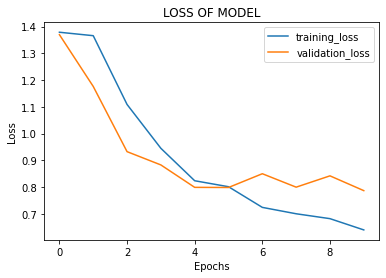

44/44 [==============================] - 1s 28ms/step


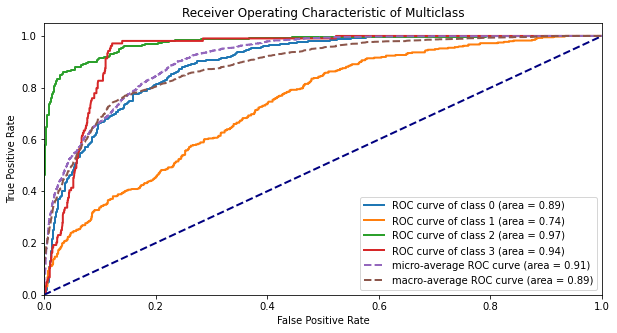

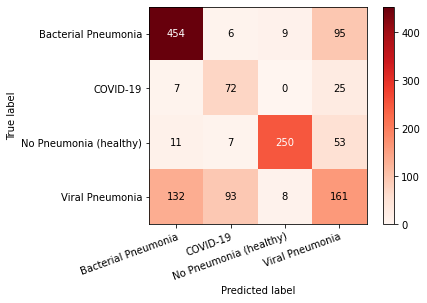

                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.75      0.80      0.78       564
              COVID-19       0.40      0.69      0.51       104
No Pneumonia (healthy)       0.94      0.78      0.85       321
       Viral Pneumonia       0.48      0.41      0.44       394

              accuracy                           0.68      1383
             macro avg       0.64      0.67      0.65      1383
          weighted avg       0.69      0.68      0.68      1383



In [80]:
##------ploting from BASELINE only 
plot_acc_loss(tuned_history)

##----Getting prediction based in the baseline model 
y_pred = tuned_model_1.predict(X_test) 

#-------Plot ROC of the baselinemodel 
plot_ROC_curve(y_pred,y_test_onehot, num_classes)

##----CM Matrix plot
plot_cm(label_map,y_pred,y_test)

#precision and recall and f1-score, accuracy 
table_p_r_f1(y_test,y_pred,label_map)

### 3.5 Grid search / Finding the best parameters

The purpose of this grid search was to find the optimal alpha values for the LeakyReLUs of the tuned model.

This experiment was conducted for a previous version of the tuned model above, which was the one with the best performance among all those that were built during the assignment.

#### 3.5.1 Grid Search for hyperparameter alpha (LeakyReLU)

In [ ]:
# Train the model for 10 epochs with a batch size of 32
# Define the hyperparameters to test
param_grid = {
    'alpha1': [0.1, 0.01],
    'alpha2': [0.1, 0.01],
    'alpha3': [0.1, 0.01],
    'alpha4': [0.1, 0.01],
    'alpha5': [0.1, 0.01]
}

# Create a KerasClassifier with the create_model function
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_optimized_model, epochs=1, batch_size=32)

# Perform a grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train_onehot)

# Print the results of the grid search
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#### 3.5.2 Optuna optimization for filters and kernel size

In [ ]:
### Optuna optimization

# Define the study
study = optuna.create_study(direction='minimize')

# Start the optimization process
study.optimize(objective, n_trials=100)

# Print the best hyperparameters found by Optuna
print(f'Best hyperparameters: {study.best_params}')

# Create the best model
best_model = create_model(study.best_trial)

# Train the best model for 10 epochs
best_history = best_model.fit(
    X_train_norm,
    y_train_onehot,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_norm, y_val_onehot)
)

# 4. Transfer Learning

### 4.1 VGG16

#### 4.1.1 Transfer learning with VGG16

In [83]:
# Import VGG16
vgg_model = VGG16(include_top=False, input_shape=(156, 156, 3))

# FReezing VGG16 layers
for layer in vgg_model.layers:
    layer.trainable = False

## adding "custom" layers

## Flatten layer
flat_1 = layers.Flatten()(vgg_model.layers[-1].output)

## Dense layers
dense_1 = layers.Dense(32, activation='relu')(flat_1)

#output layer with softmax 
output = layers.Dense(4, activation='softmax')(dense_1)

# define new model
tl_model = Model(inputs=vgg_model.inputs, outputs=output)

# summarize
tl_model.summary()
 
# compile model
tl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

# fit model
tl_trained = tl_model.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), batch_size=64 ,epochs=10, verbose=1)

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 156, 156, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 156, 156, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 156, 156, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 78, 78, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 78, 78, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 78, 78, 128)       147584    
                                                              

#### 4.1.2 Analyze performance of VGG16 transfer learning model

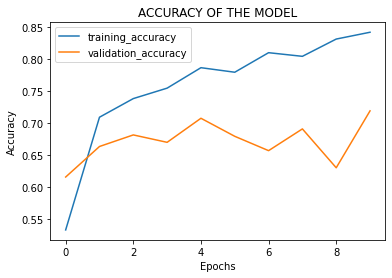

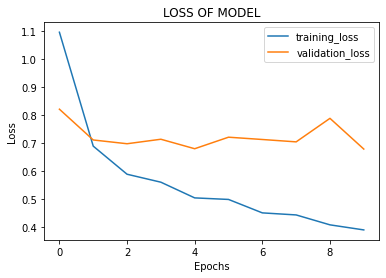

44/44 [==============================] - 6s 96ms/step


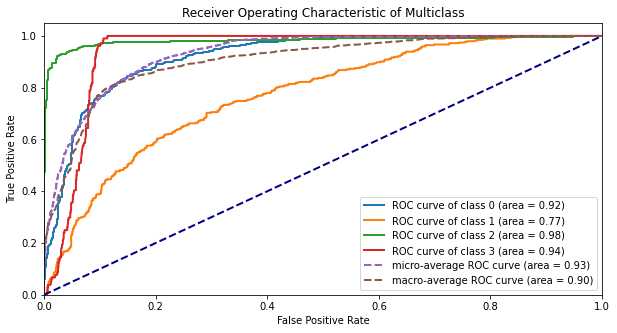

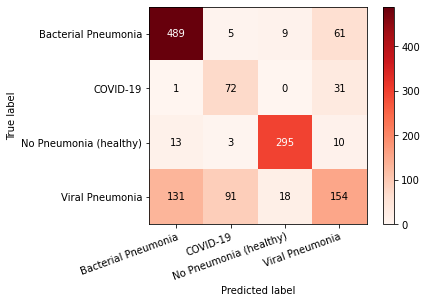

                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.77      0.87      0.82       564
              COVID-19       0.42      0.69      0.52       104
No Pneumonia (healthy)       0.92      0.92      0.92       321
       Viral Pneumonia       0.60      0.39      0.47       394

              accuracy                           0.73      1383
             macro avg       0.68      0.72      0.68      1383
          weighted avg       0.73      0.73      0.72      1383



In [85]:
##------ Accuracy plot for VGG16 TL model 
plot_acc_loss(tl_trained)

##----Getting prediction based in the VGG16 TL model
y_pred = tl_model.predict(X_test) 

#-------Plot ROC of the VGG16 TL model
plot_ROC_curve(y_pred,y_test_onehot,num_classes)

##----CM Matrix plot for VGG16 TL Model
plot_cm(label_map,y_pred,y_test)

#precision and recall and f1-score, accuracy 
table_p_r_f1(y_test,y_pred,label_map)

### 4.2 ResNet50

#### 4.2.1 Transfer learning with ResNet50

In [88]:
# TUNED MODEL 1: BASELINE + LR SCHEDULER + KFOLD VALIDATION + EARLY STOPPING + LeakyReLU (gridsearch for alpha) + L2 regularizer
# FAILED CHANGES VS BASELINE INDICATED WITH A HASHTAG

RN50_model = build_h_model()

RN50_model.summary()

# Train the model for 10 epochs with a batch size of 32
res_history = RN50_model.fit(
    X_train,
    y_train_onehot,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val_onehot))

Model: "h_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156, 156, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_104 (Conv2D)            (None, 156, 156, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_105 (Conv2D)            (None, 156, 156, 32  18464       ['conv2d_104[0][0]']             
                                )                                                           

#### 4.2.2 Analyze performance of ResNet50 transfer learning model

In [91]:
res_history.history

{'loss': [1.965046763420105,
  1.0820930004119873,
  1.0059758424758911,
  0.8269016742706299,
  0.7835140824317932,
  0.7054092884063721,
  0.6419947147369385,
  0.6164476871490479,
  0.5388914346694946,
  0.4952733814716339],
 'accuracy': [0.4161931872367859,
  0.5085227489471436,
  0.5674715638160706,
  0.6590909361839294,
  0.6661931872367859,
  0.6967329382896423,
  0.7208806872367859,
  0.7357954382896423,
  0.7819602489471436,
  0.7897727489471436],
 'val_loss': [1.0571593046188354,
  0.9309332966804504,
  0.8493589758872986,
  0.7857447266578674,
  0.7226653695106506,
  0.8524911403656006,
  0.74381023645401,
  0.7027799487113953,
  0.8115795850753784,
  0.7972273826599121],
 'val_accuracy': [0.5162689685821533,
  0.6102675199508667,
  0.6587129235267639,
  0.6789587736129761,
  0.6905278563499451,
  0.6413593888282776,
  0.6934201121330261,
  0.6919739842414856,
  0.7020968794822693,
  0.6840202212333679]}

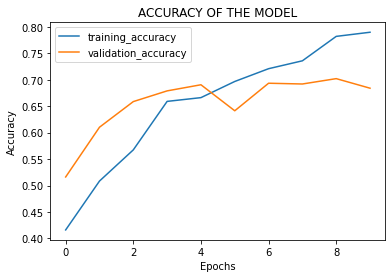

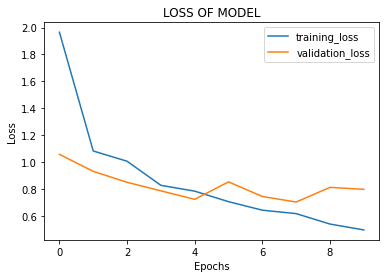

44/44 [==============================] - 2s 34ms/step


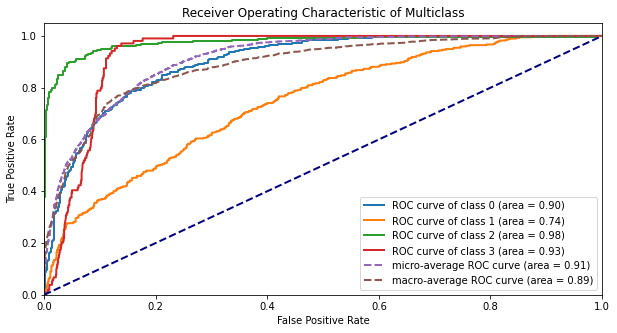

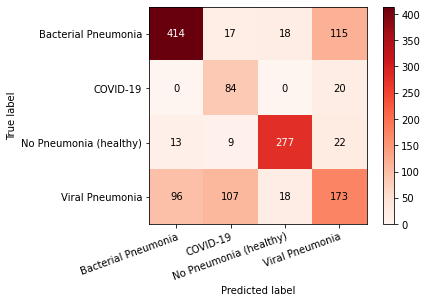

                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.79      0.73      0.76       564
              COVID-19       0.39      0.81      0.52       104
No Pneumonia (healthy)       0.88      0.86      0.87       321
       Viral Pneumonia       0.52      0.44      0.48       394

              accuracy                           0.69      1383
             macro avg       0.65      0.71      0.66      1383
          weighted avg       0.71      0.69      0.69      1383



In [89]:
##------ Accuracy plot for VGG16 TL model 
plot_acc_loss(res_history)

##----Getting prediction based in the VGG16 TL model
y_pred = RN50_model.predict(X_test) 

#-------Plot ROC of the VGG16 TL model
plot_ROC_curve(y_pred,y_test_onehot,num_classes)

##----CM Matrix plot for VGG16 TL Model
plot_cm(label_map,y_pred,y_test)

#precision and recall and f1-score, accuracy 
table_p_r_f1(y_test,y_pred,label_map)

# 5. Cross-model performance comparison

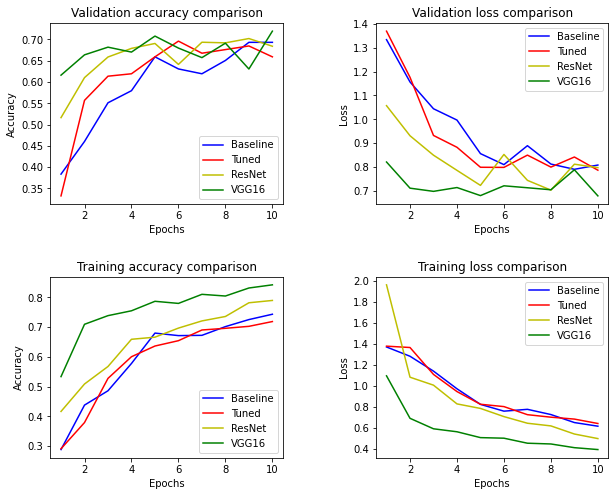

In [90]:
models_compared=[baseline_history, tuned_history, res_history, tl_trained]
name_models=['Baseline', 'Tuned', 'ResNet', "VGG16"]

plot_comparison_acc_loss(models_compared,name_models, num_epochs)